In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import re
import random
from datetime import date
from IPython.display import clear_output

<h3>Задание 1. Частотный анализ символов</h3>

Загрузим текст "Войны и мира" и посчитаем статистики встречаемости отдельных символов

In [2]:
f = open('./corpora/WarAndPeace.txt', 'r')
text = f.read()
text = ' '.join(text.lower().split())

In [3]:
text_len = len(text)
text_len

714348

In [4]:
text[:200]

'annotation "война и мир" – самый известный роман льва николаевича толстого, как никакое другое произведение писателя, отражает глубину его мироощущения и философии. эта книга из разряда вечных, потому'

In [5]:
symbol_frequency = dict()
for i in range(ord('а'), ord('я') + 1):
    symbol_frequency[chr(i)] = 0
symbol_frequency[' '] = 0
symbol_frequency['ё'] = 0

In [6]:
for c in text:
    if c in symbol_frequency.keys():
        symbol_frequency[c] += 1
for key in symbol_frequency.keys():
    symbol_frequency[key] /= text_len

In [7]:
symbol_frequency

{'а': 0.06328708136650484,
 'б': 0.01303286353429981,
 'в': 0.034750569750317775,
 'г': 0.015646435630812992,
 'д': 0.022939799649470564,
 'е': 0.059521409733071275,
 'ж': 0.007643333501318685,
 'з': 0.013441627890047988,
 'и': 0.05016882527843572,
 'й': 0.008693241949302022,
 'к': 0.027056840643495887,
 'л': 0.038184470314188604,
 'м': 0.0223140542144725,
 'н': 0.049162313046302364,
 'о': 0.08578731934575305,
 'п': 0.01938410970563367,
 'р': 0.03439500075593408,
 'с': 0.03937576643316703,
 'т': 0.042862862358402344,
 'у': 0.021633713540179296,
 'ф': 0.0016924524181491374,
 'х': 0.00643943848096446,
 'ц': 0.0030503340108742516,
 'ч': 0.010287702912306048,
 'ш': 0.007125378666980239,
 'щ': 0.002119415186995694,
 'ъ': 0.0003961654543723787,
 'ы': 0.014324950864284635,
 'ь': 0.014695918515905413,
 'э': 0.0022804011490198057,
 'ю': 0.004892573367602345,
 'я': 0.017466276940650775,
 ' ': 0.15930890826319946,
 'ё': 0.000603347388107757}

In [8]:
russian_alphabet = set(symbol_frequency.keys())

Загрузим текст "Евгения Онегина" для тестирования, разделив его на строфы

In [9]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text2 = iofile.readlines()
    
text2 = [x.replace('\t\t', '') for x in text2]

--2021-05-04 16:47:27--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… ошибка: nodename nor servname provided, or not known.
wget: не удаётся разрешить адрес «raw.githubusercontent.com»


In [10]:
def poetry_preprocessing(text):
    poetry_texts = []
    cur_poetry = ''
    for i in range(len(text)):
        sentence = text[i]
        if len(sentence) > 15:
            cur_poetry = cur_poetry + sentence.lower()
        elif len(cur_poetry) > 100:
            cur_poetry = re.sub(r"\W+", " ", cur_poetry).lower()
            if set(cur_poetry).issubset(russian_alphabet):
                poetry_texts.append(cur_poetry)
            cur_poetry = ''
    return poetry_texts

In [11]:
poetry_texts = poetry_preprocessing(text2)
print("total texts:", len(poetry_texts))
print("example:\n" + poetry_texts[0])

total texts: 342
example:
 мой дядя самых честных правил когда не в шутку занемог он уважать себя заставил и лучше выдумать не мог его пример другим наука но боже мой какая скука с больным сидеть и день и ночь не отходя ни шагу прочь какое низкое коварство полуживого забавлять ему подушки поправлять печально подносить лекарство вздыхать и думать про себя когда же черт возьмет тебя 


In [12]:
def encrypt_text(text):
    letters = list(russian_alphabet)
    subst_dict = dict()
    new_letters = list(np.random.permutation(list(letters)))
    for i in range(len(letters)):
        subst_dict[letters[i]] = new_letters[i]
    new_text = ''
    for c in text:
        new_text = new_text + subst_dict[c]
    return new_text

In [13]:
def decipher_text(text):
    text_frequency = dict()
    for i in range(ord('а'), ord('я') + 1):
        text_frequency[chr(i)] = 0
    text_frequency[' '] = 0
    text_frequency['ё'] = 0
    for c in text:
        if c in symbol_frequency.keys():
            text_frequency[c] += 1
    current_symbols_frequencies = [k for k, v in sorted(text_frequency.items(), key=lambda item: -item[1])]
    symbols_by_frequency = [k for k, v in sorted(symbol_frequency.items(), key=lambda item: -item[1])]
    deciphered = ''
    for c in text:
        deciphered = deciphered + symbols_by_frequency[current_symbols_frequencies.index(c)]
    return deciphered

In [14]:
def get_quality(deciphered, original):
    good = 0
    for i in range(len(deciphered)):
        if deciphered[i] == original[i]:
            good += 1
    return good/len(deciphered)

def get_mean_quality(poetry_texts, encrypt_text, decipher_text, rule=None):
    quality = 0
    for test_example in poetry_texts:
        encrypted_text = encrypt_text(test_example)
        if rule:
            deciphered_text = decipher_text(encrypted_text, rule)
        else:
            deciphered_text = decipher_text(encrypted_text)
        quality += get_quality(deciphered_text, test_example)
    return quality / len(poetry_texts)

In [15]:
print("Mean_score:", get_mean_quality(poetry_texts, encrypt_text, decipher_text))

Mean_score: 0.3081842066992136


In [16]:
print("Whole_text:", get_quality(decipher_text(encrypt_text(' '.join(poetry_texts))), ' '.join(poetry_texts)))

Whole_text: 0.5401557395981127


In [17]:
print("Example\n")
print("Original_example:\n", poetry_texts[0], "\n")
encrypted = encrypt_text(poetry_texts[0])
print("Encrypted:\n", encrypted, "\n")
deciphered = decipher_text(encrypted)
print("Deciphered:\n", deciphered)
print("Quality:\n", get_quality(deciphered, poetry_texts[0]))

Example

Original_example:
  мой дядя самых честных правил когда не в шутку занемог он уважать себя заставил и лучше выдумать не мог его пример другим наука но боже мой какая скука с больным сидеть и день и ночь не отходя ни шагу прочь какое низкое коварство полуживого забавлять ему подушки поправлять печально подносить лекарство вздыхать и думать про себя когда же черт возьмет тебя  

Encrypted:
 шгэаш о ошяегкъшыйяюжкъшмщерьнштэд ешжйшршичютчшзежйгэдшэжшчресеюушяйлошзеяюерьншьшнчыийшрк чгеюушжйшгэдшйдэшмщьгйщш щчдьгшжечтешжэшлэсйшгэаштетеошятчтешяшлэнужкгшяь йюушьш йжушьшжэыушжйшэюъэ ошжьшиедчшмщэыуштетэйшжьзтэйштэрещяюрэшмэнчсьрэдэшзелерноюушйгчшмэ читьшмэмщерноюушмйыенужэшмэ жэяьюушнйтещяюрэшрз къеюушьш чгеюушмщэшяйлоштэд ешсйшыйщюшрэзугйюшюйлош 

Deciphered:
  дох кгкг мадчш беминчш упавля тоька не в йритр ыанедоь он рважаис мезг ыамиавля л ярбйе вчкрдаис не доь еьо уплдеп кпрьлд нарта но зоже дох татаг мтрта м зояснчд млкеис л кенс л нобс не оишокг нл йаьр упобс татое нлытое това

Видно, что пробелы и некоторые буквы угаданы верно, но текст все еще сложно узнаваем. Качество расшифровки на всем тексте Евгения Онегина выше, так как статистики на большем объеме данных более точные

<h3>Задание 2. Частотный анализ биграмм</h3>

Выплним подсчет аналогичных статистик, но уже не для символов, а биграмм

In [18]:
bigram_frequency = dict()
for i in russian_alphabet:
    for j in russian_alphabet:
        bigram_frequency[i + j] = 0
for i in range(len(text) - 1):
    if text[i] + text[i + 1] in bigram_frequency.keys():
        bigram_frequency[text[i] + text[i + 1]] += 1
for key in bigram_frequency.keys():
    bigram_frequency[key] /= text_len
bigram_frequency = {k:v for k, v in sorted(bigram_frequency.items(), key=lambda item: -item[1])}

In [19]:
bigram_frequency['г ']

0.0005725500736335792

In [20]:
def decipher_text_bigrams(text):
    current_frequency = dict()
    for i in russian_alphabet:
        for j in russian_alphabet:
            current_frequency[i + j] = 0
    for i in range(0, len(text) - 1, 2):
        if text[i] + text[i + 1] in current_frequency.keys():
            current_frequency[text[i] + text[i + 1]] += 1
    current_bigram_frequencies = [k for k, v in sorted(current_frequency.items(), key=lambda item: -item[1])]
    bigram_by_frequency = [k for k, v in sorted(bigram_frequency.items(), key=lambda item: -item[1])]
    deciphered = ''
    for i in range(0, len(text) - 1, 2):
        deciphered = deciphered + bigram_by_frequency[current_bigram_frequencies.index(text[i] + text[i + 1])]
    return deciphered

In [21]:
print("Mean_score:", get_mean_quality(poetry_texts, encrypt_text, decipher_text_bigrams))

Mean_score: 0.09248590864270564


In [22]:
print("Whole_text:", get_quality(decipher_text_bigrams(encrypt_text(' '.join(poetry_texts))), ' '.join(poetry_texts)))

Whole_text: 0.13045666017751675


In [23]:
print("Example\n")
print("Original_example:\n", poetry_texts[0], "\n")
encrypted = encrypt_text(poetry_texts[0])
print("Encrypted:\n", encrypted, "\n")
deciphered = decipher_text_bigrams(encrypted)
print("Deciphered:\n", deciphered)
print("Quality:\n", get_quality(deciphered, poetry_texts[0]))

Example

Original_example:
  мой дядя самых честных правил когда не в шутку занемог он уважать себя заставил и лучше выдумать не мог его пример другим наука но боже мой какая скука с больным сидеть и день и ночь не отходя ни шагу прочь какое низкое коварство полуживого забавлять ему подушки поправлять печально подносить лекарство вздыхать и думать про себя когда же черт возьмет тебя  

Encrypted:
 а мюаябябауэ звагдуцжзвачиэрлоаъмыяэаждараьщцъщахэжд мыамжащрэкэцйаудебахэуцэрлоалаощгьдарзящ эцйажда мыадымачил диаяищыл ажэщъэажмаемкда мюаъэъэбауъщъэауаемойжз аулядцйалаяджйалажмгйаждамцвмябажлаьэыщачимгйаъэъмдажлхъмдаъмрэиуцрмачмощклрмымахэеэробцйад щачмящьълачмчиэробцйачдгэойжмачмяжмулцйаодъэиуцрмархязвэцйалаящ эцйачимаудебаъмыяэакдагдицармхй дцацдеба 

Deciphered:
 неь  дмоа ан мниростотни пго те  ввои я имор ч ино опрбый азннтинатол а ностго тпоемларееробко бо  оне вжеойалесвальделиняи ом ни  ссяегнеь е скогто з нтолекаеннытосьоно олк оспои ово  о еилтаа рау ат и пово  ндая рарум е в т

<h3>Задание 3. MCMC-cэмплирование. Блуждание Метрополиса-Гастингса</h3>

Пусть есть зашифрованный текст. 

1)Каждому символу в соответствие поставим случайным образом букву русского алфавита. Назовем это текущим правилом подстановки. Далее посчитаем "правдоподобие" текста, полученного после замены всех символов зашифрованного текста с помощью выбранного правила подстановки. Для подсчета "правдоподобия" для каждой пары последовательных букв в тексте после применения правил подстановки посчитаем статистику ее встречаемости в "Войне и мире". После чего все полученные значения перемножим. Эта величина будет задавать "правдоподобие" полученного текста и соответсвенно качество правила подстановки.

2)Далее случайным образом изменим текущее правило подстановки для двух символов.

3)Если качество нового правила подстановки выше текущего, то новое правило подстановки становится текущим и переходим к шагу 5 

4)Если качество нового правила подстановки хуже текущего, то подбрасываем монетку, которая с вероятностью 
(качество новой подстановки)/(качество текущей подстановки) выпадает орлом. Если выпадает орел, новое правило подстановки становится текущим и переходим к шагу 5. Иначе остаемся при текущем правиле и переходим к шагу 5

5)Если текущее правило подстановки не помогает однозначно расшифровать текст, переходим к шагу 2

In [24]:
def decipher_rule(text, rule={x:x for x in russian_alphabet}):
    new_text = ''
    for i in range(len(text)):
        new_text += rule[text[i]]
    return new_text

In [25]:
def get_text_likelihood(deciphered_text, bigram_frequency):
    likelihood = 1
    for i in range(len(deciphered_text) - 1):
        if bigram_frequency[deciphered_text[i] + deciphered_text[i + 1]] > 0:
            likelihood *= bigram_frequency[deciphered_text[i] + deciphered_text[i + 1]] * 1000
        else:
            likelihood *= 0.1
    return likelihood

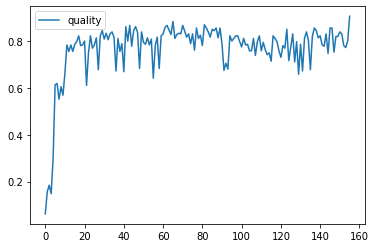

1.4325778241252271e+184  мой дядя самых шестных пварил когда не р чутку занемог он уражать себя застарил и лушче рыдумать не мог его пвимев двугим наука но боже мой какая скука с больным сидеть и день и ношь не отходя ни чагу пвошь какое низкое коравстро полужирого забарлять ему подучки попварлять пешально подносить лекавстро рздыхать и думать пво себя когда же шевт розьмет тебя 


In [26]:
test_text = """нгжднхихинчйглёнцечоклёнбфйщвмныжъхйнкенщньзоызнуйкегжънжкнзщйтйошнчеринуйчойщвмнвнмзцьенщлхзгйошнкенгжънеъжнбфвгефнхфзъвгнкйзыйнкжнржтенгждныйыйинчызыйнчнржмшклгнчвхеошнвнхекшнвнкжцшнкенжоёжхинквньйъзнбфжцшныйыженквуыженыжщйфчощжнбжмзтвщжъжнуйрйщмиошнегзнбжхзьывнбжбфйщмиошнбецймшкжнбжхкжчвошнмеыйфчощжнщухлёйошнвнхзгйошнбфжнчериныжъхйнтенцефонщжушгеоноерин"""
original_text =  """ мой дядя самых честных правил когда не в шутку занемог он уважать себя заставил и лучше выдумать не мог его пример другим наука но боже мой какая скука с больным сидеть и день и ночь не отходя ни шагу прочь какое низкое коварство полуживого забавлять ему подушки поправлять печально подносить лекарство вздыхать и думать про себя когда же черт возьмет тебя """
cur_rule = {x:x for x in russian_alphabet}
likelihood = get_text_likelihood(decipher_rule(test_text, rule=cur_rule), bigram_frequency)
history = []


for i in range(10 ** 5):
    choice = random.choices(list(russian_alphabet), k = 2)
    new_rule = cur_rule.copy()
    new_rule[choice[0]], new_rule[choice[1]] = new_rule[choice[1]], new_rule[choice[0]]
    cur_likelihood = get_text_likelihood(decipher_rule(test_text, rule=new_rule), bigram_frequency)
    if cur_likelihood > likelihood:
        likelihood = cur_likelihood
        cur_rule = new_rule.copy()
    else:
        if random.random() < cur_likelihood / likelihood:
            likelihood = cur_likelihood
            cur_rule = new_rule.copy()
    if i % 500 == 0:
        history.append(get_quality(decipher_rule(test_text, rule=new_rule), original_text))
        clear_output(True)
        plt.plot(history,label='quality')
        plt.legend()
        plt.show()
        print(likelihood, decipher_rule(test_text, rule=new_rule))
        if get_quality(decipher_rule(test_text, rule=new_rule), original_text) > 0.9:
            break

In [27]:
get_quality(decipher_rule(test_text, rule=new_rule), original_text)

0.9078212290502793

Можно заметить, что качество расшифровки заметно выросло и изначальный текст можно угадать, посомтрев на результат. Посимвольное совпадение получить вряд ли получится, так как частоты встречаемости биграм в исходном тексте не совпадают с частой встречаемости в "Войне и мире"

<h3>Задание 4. Расшифровка закодированного сообщения</h3>

Так как задание на русском, предположим, что зашифрован русскоязычный текст

In [37]:
message = """←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"""

In [38]:
symbols = set(message)
len(symbols)

28

In [39]:
len(russian_alphabet)

34

Добьем число исходных символов до размера русскоязычного алфавита для возможности задать биекцию

In [40]:
symbols.add('a')
symbols.add('b')
symbols.add('c')
symbols.add('d')
symbols.add('e')
symbols.add('f')

In [46]:
symbols = list(symbols)
letters = list(russian_alphabet)

In [47]:
cur_rule = dict()
for i in range(len(symbols)):
    cur_rule[symbols[i]] = letters[i]

In [48]:
cur_rule['↝']

'ш'

In [49]:
likelihood = get_text_likelihood(decipher_rule(message, rule=cur_rule), bigram_frequency)

for i in range(10 ** 6):
    choice = random.choices(symbols, k = 2)
    new_rule = cur_rule.copy()
    new_rule[choice[0]], new_rule[choice[1]] = new_rule[choice[1]], new_rule[choice[0]]
    cur_likelihood = get_text_likelihood(decipher_rule(message, rule=new_rule), bigram_frequency)
    if cur_likelihood > likelihood:
        likelihood = cur_likelihood
        cur_rule = new_rule.copy()
    else:
        if random.random() < cur_likelihood / likelihood:
            likelihood = cur_likelihood
            cur_rule = new_rule.copy()
    if i % 500 == 0:
        clear_output(True)
        print(likelihood, decipher_rule(message, rule=new_rule))

9.838064699422313e+125 если вы вимите норзальнык или подти норзальнык тейст у этого сообщения йоторык легйо продитать сйорее всего вы все смелали правильно и полудите зайсизальнык балл ча послемнее детвертое чамание йурса фотя йонедно я нидего не обещаю


Прочитать сообщение не составляет труда, особенно когда текст печатается каждые 500 итераций(правильные буквы довольно часто встают на свои места):
"Если вы видите нормальный или почти нормальный текст у этого сообщения, который легко прочитать, скорее всего, вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса, хотя, конечно, я ничего не обещаю"